In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from scipy import stats
import statsmodels.api as sm
from datetime import date
from sklearn import metrics

In [72]:
ames = pd.read_csv('./frames/training.csv')
ames_raw = pd.read_csv('./data/train.csv') # easier with categorical values

In [73]:
plt.style.use('seaborn-colorblind')
sns.set_style('whitegrid')

# EDA

### Pearson Scores of `SalePrice`

In [74]:
# most correlated Values to Sale Price
ames.corr()['SalePrice'].sort_values(ascending=False).head(10)

SalePrice        1.000000
Overall Qual     0.800207
Exter Qual       0.712146
curb_appeal      0.707847
total_SF         0.705270
Gr Liv Area      0.697038
Kitchen Qual     0.692336
overall_quals    0.660269
Garage Area      0.649897
Garage Cars      0.647781
Name: SalePrice, dtype: float64

## Histograms

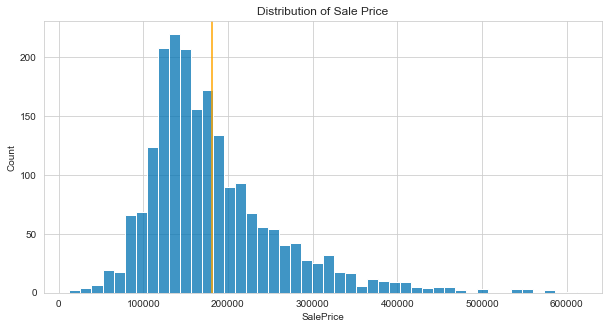

In [75]:
# What are most of our houses selling for? Orange line represents the mean
plt.figure(figsize=(10,5))
sns.histplot(data=ames['SalePrice'])
plt.title('Distribution of Sale Price')
plt.axvline(ames_raw['SalePrice'].mean(),color='orange');

Our mean is being affected by some pretty significant outliers in our Sale Price.

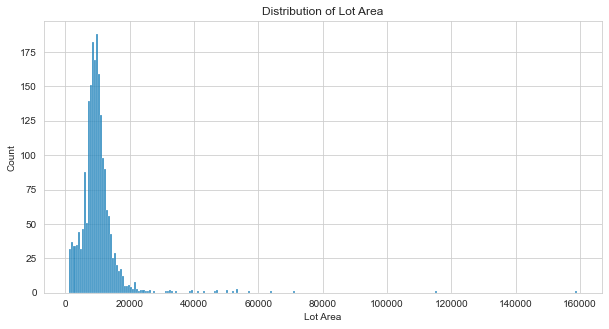

In [76]:
# Distribution of Lot Area
plt.figure(figsize=(10,5))
sns.histplot(data=ames['Lot Area'])
plt.title('Distribution of Lot Area');

We have an outlier of 160,000 feet. This could be an error, although not impossible to believe. It would be about two acres of land which is not unreasonable. After doing a quick google search of ClearCreek it definitely doesn't look to be impossible. It would prbobably be best to leave this.

In [77]:
# Outlier Neighborhood
ames_raw[ames_raw['Lot Area'] > 150_000]['Neighborhood']

471    ClearCr
Name: Neighborhood, dtype: object

In [78]:
# Outlier Price
ames_raw[ames_raw['Lot Area'] > 150_000]['SalePrice']

471    277000
Name: SalePrice, dtype: int64

## Scatter Plots

#### Quality

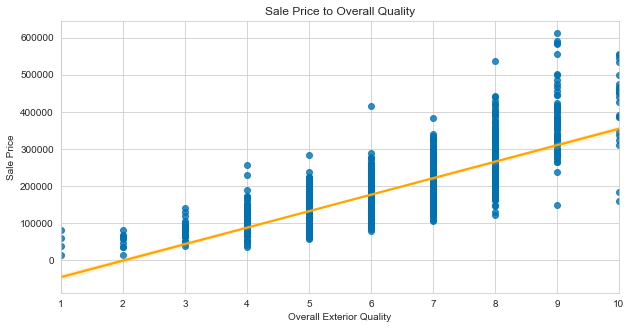

In [79]:
plt.figure(figsize=(10,5))
sns.regplot(data=ames,x='Overall Qual',y='SalePrice',line_kws={'color':'orange'})
plt.title('Sale Price to Overall Quality')
plt.xlabel('Overall Exterior Quality')
plt.ylabel('Sale Price');

#### Size

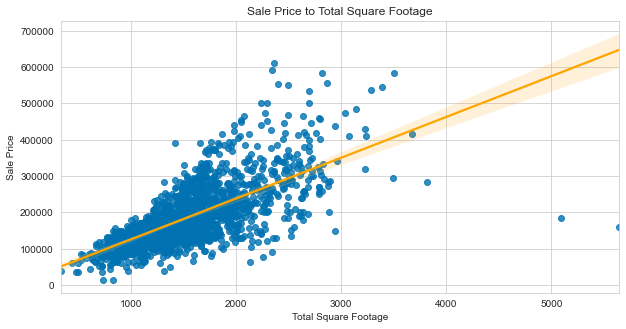

In [80]:
# SalePrice to Total_SF
plt.figure(figsize=(10,5))
sns.regplot(data=ames,x='total_SF',y='SalePrice',line_kws={'color':'orange'})
plt.title('Sale Price to Total Square Footage')
plt.xlabel('Total Square Footage')
plt.ylabel('Sale Price');

From these scatterplots we can see a clear positive relationship between the **quality** of the house and the **size** of the house.

## Bar Graph

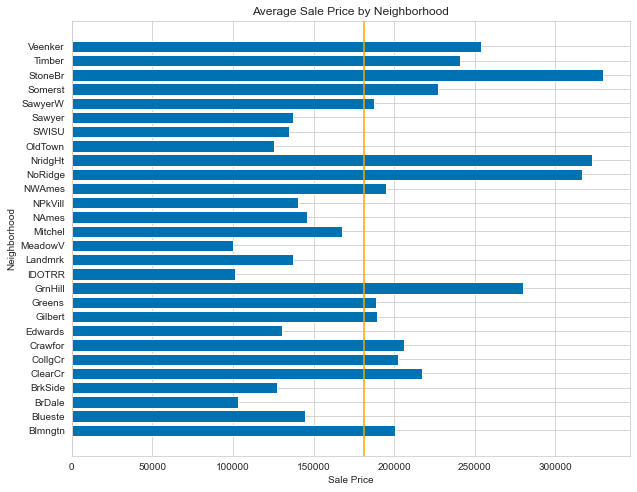

In [81]:
# what is the average price per neighborhood compared to the average price of the data set
x = ames_raw.groupby('Neighborhood')['SalePrice'].mean()
plt.figure(figsize=(10,8))
plt.barh(x.keys(), x.values)
plt.title('Average Sale Price by Neighborhood')
plt.ylabel('Neighborhood')
plt.xlabel('Sale Price')
plt.axvline(ames_raw['SalePrice'].mean(),color='orange');

I went over in the presentation that I think value of a house can be derived from location above all things. If there was a way to compare the neighborhoods to one another and create buckets based on average neighborhood value, I think we could significantally improve our model.

## Line Graph

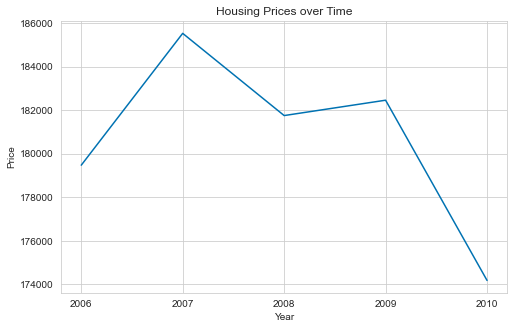

In [117]:
plt.figure(figsize=(8,5))
ax = plt.axes()
ax.plot(ames.groupby('Yr Sold')['SalePrice'].mean())
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
plt.title('Housing Prices over Time')
plt.xlabel('Year')
plt.ylabel('Price');

We can observe a general downard trend from 2008 to 2010. This was the recession. Meaning this is an extra bad time to generalize our findings with.